<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#목표" data-toc-modified-id="목표-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>목표</a></span><ul class="toc-item"><li><span><a href="#훈련데이터와-검증데이터-분리" data-toc-modified-id="훈련데이터와-검증데이터-분리-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>훈련데이터와 검증데이터 분리</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#선형분류-모델-규제-적용(하이퍼파라미터-튜닝)" data-toc-modified-id="선형분류-모델-규제-적용(하이퍼파라미터-튜닝)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>선형분류 모델 규제 적용(하이퍼파라미터 튜닝)</a></span></li><li><span><a href="#테스트-데이터-평가" data-toc-modified-id="테스트-데이터-평가-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>테스트 데이터 평가</a></span><ul class="toc-item"><li><span><a href="#예측의-불확실성-이해" data-toc-modified-id="예측의-불확실성-이해-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>예측의 불확실성 이해</a></span></li><li><span><a href="#실제-데이터-예측" data-toc-modified-id="실제-데이터-예측-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>실제 데이터 예측</a></span></li></ul></li></ul></li></ul></div>

## 목표
- 선형분류모델을 활용하여 손글씨 데이터를 예측하는 모델링을 해보자
- 이미지 데이터의 구조를 파악하고 사용해보자
- 예측의 불확실성을 이해해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로딩
train = pd.read_csv("./data/digit/train.csv")
test = pd.read_csv("./data/digit/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 데이터 shape 확인
print(train.shape, test.shape)

(42000, 785) (28000, 784)


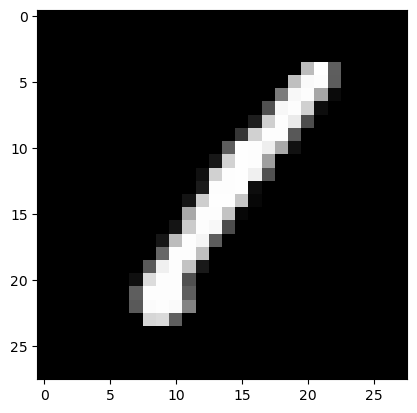

In [5]:
# 이미지 시각화
img = train.iloc[0, 1:]
plt.imshow(img.values.reshape(28, 28), cmap='gray')

(array([700.,   2.,   2.,  14.,   2.,   1.,   4.,   8.,   9.,  42.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

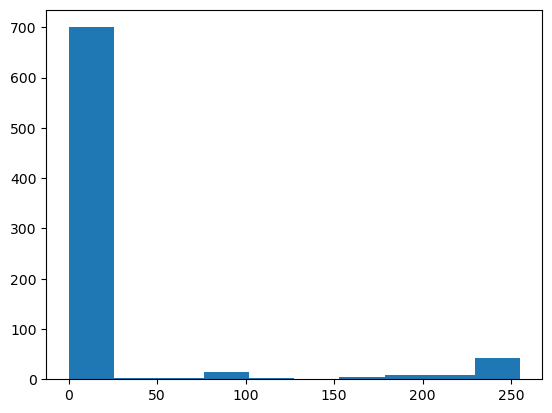

In [6]:
# 데이터 분포 확인
plt.hist(img)

In [7]:
print(max(img))
print(min(img))

255
0


In [8]:
# 정답데이터 분포 확인
train.iloc[:,0].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

### 훈련데이터와 검증데이터 분리

In [9]:
X = train.iloc[:,1:]  # 문제
y = train.iloc[:,0]  # 답
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=424, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### 모델링
- KNN
- Tree
- Logistic
- SVM

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [12]:
knn_m = KNeighborsClassifier()
tree_m = DecisionTreeClassifier()
logi_m = LogisticRegression()
svm_m = LinearSVC()

In [13]:
knn_m.fit(X_train, y_train)
tree_m.fit(X_train, y_train)
logi_m.fit(X_train, y_train)
svm_m.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [15]:
print("KNN score : ", knn_m.score(X_val, y_val))
print("Tree score : ", tree_m.score(X_val, y_val))
print("Logistic score : ", logi_m.score(X_val, y_val))
print("SVM score : ", svm_m.score(X_val, y_val))

KNN score :  0.9689285714285715
Tree score :  0.8620238095238095
Logistic score :  0.9178571428571428
SVM score :  0.8646428571428572


### 선형분류 모델 규제 적용(하이퍼파라미터 튜닝)

In [16]:
# 분류모델의 규제 파라미터는 C
# C값이 클수록 규제가 약해지고, C값이 작을수록 규제가 강력해짐
c_list = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]  # 약한 거 - > 강한 거

In [17]:
logi_score = []  # 성능이 들어갈 리스트
for c in c_list:
    m = LogisticRegression(C=c)
    m.fit(X_train, y_train)
    s = m.score(X_val, y_val)
    logi_score.append(s)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

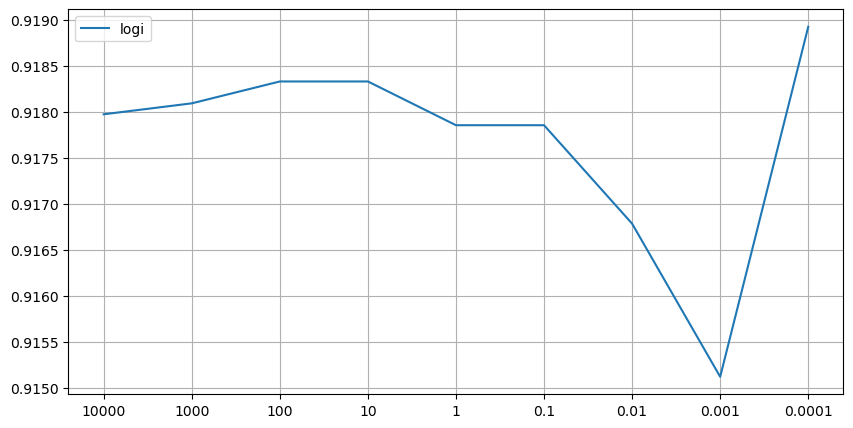

In [19]:
plt.figure(figsize=(10,5))
plt.plot(range(len(c_list)), logi_score, label='logi')
plt.xticks(range(len(c_list)), c_list)
plt.legend()
plt.grid()
plt.show()

### 테스트 데이터 평가

In [20]:
pre = logi_m.predict(test)
pre

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
submission = pd.read_csv("./data/digit/sample_submission.csv")

In [22]:
submission['Label'] = pre

In [23]:
submission.to_csv("./my_predict_logi.csv", index=False)

#### 예측의 불확실성 이해

In [24]:
train_pre = logi_m.predict(X_train.iloc[:5,:])
train_pre

array([0, 0, 6, 7, 8], dtype=int64)

In [25]:
logi_m.predict_proba(X_train.iloc[:5,:])

array([[9.94177504e-01, 1.65098732e-13, 1.72748159e-07, 1.46003041e-07,
        9.72584965e-16, 5.78894111e-03, 1.16513752e-06, 7.63134257e-12,
        3.20712959e-05, 7.44936670e-11],
       [9.99612532e-01, 6.20009452e-17, 1.88979070e-04, 2.70090400e-07,
        6.83090955e-12, 9.27603844e-07, 8.01080544e-08, 1.14709921e-11,
        1.97210247e-04, 7.28270069e-10],
       [3.52158003e-07, 1.94513751e-09, 4.47828810e-04, 5.89708296e-07,
        4.36799403e-07, 3.10621062e-04, 9.99014446e-01, 1.54241028e-11,
        2.25718613e-04, 4.49855977e-09],
       [3.55658213e-10, 7.39088440e-14, 5.96706114e-11, 1.77101368e-07,
        2.97187370e-08, 4.20503236e-07, 5.92448021e-14, 9.98555951e-01,
        8.03830780e-05, 1.36303840e-03],
       [6.97022910e-07, 5.44809775e-12, 4.38660573e-06, 8.20615128e-11,
        1.29343198e-08, 7.21236450e-04, 1.02939350e-09, 2.84190721e-16,
        9.99272546e-01, 1.11982973e-06]])

#### 실제 데이터 예측

In [26]:
from PIL import Image

In [29]:
my = Image.open("./data/digit/4.png").convert("L")  # 컬러 -> 흑백 채널

In [30]:
my

In [31]:
reshape_img = np.array(my).reshape(1,-1)  # 예측을 위해 1장의 이미지를 1차원으로 변경
reshape_img.shape

(1, 784)

In [32]:
logi_m.predict(reshape_img)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([7], dtype=int64)